In [469]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from collections import defaultdict

In [470]:
def parse_log(log_fp):
    with open(log_fp) as fh:
        log = fh.readlines()
    
    a = [line.strip('\n').split(' ') for line in log]
    d = defaultdict(dict)
    
    for line in a:
        if 'Step' not in line[0] and 'Epoch' not in line[0]:
            continue
        step = int(line[1])
        for k, v in zip(line[2::2], line[3::2]):
            d[step][k] = float(v)
            
    return pd.DataFrame(d.values(), index=d.keys())

def plot(runs, k1, k2, logy=True, smooth_cols=[], smooth_window=5):
    # Loss Logging
    fig, ax = plt.subplots(ncols=2, figsize=(13,5))

    for run in runs:
        s = run.split('/')
        optimizer = s[-2]
        name = s[-1].replace('.log', '')
        
        df = parse_log(run)

        try:
            for col in smooth_cols:
                df[col] = df[col].rolling(smooth_window).mean()
                
            kind='line'
            df.plot(kind=kind, logy=logy, ax=ax[0], y=k1, label=optimizer)
            df.plot(kind=kind, logy=logy, ax=ax[1], y=k2, label=optimizer)
        except KeyError:
            continue
            
    ax[0].set_title(f'Training {name} - {ds} {model}')
    ax[1].set_title(f'Validation {name} - {ds} {model}')
    return ax[0], ax[1]
            
def plot_best_value(runs, k1, k2):
    fig, ax = plt.subplots(ncols=2, figsize=(13,5))
    combined_df = pd.DataFrame()
    
    for run in runs:
        s = run.split('/')
        optimizer = s[-2]
        ds = s[1]
        model = s[2]
        name = s[-1].replace('.log', '')
        
        df = parse_log(run)
        try:
            best_value = df[df.test_acc == df.test_acc.max()].copy()
            best_value['optimizer'] = optimizer
            combined_df = combined_df.append(best_value)
        except (KeyError, IndexError, AttributeError):
            continue
    combined_df.sort_values(inplace=True, by='test_acc', ascending=False)
    combined_df.plot(kind='bar', y=k1, x='optimizer', ax=ax[0])
    combined_df.plot(kind='bar', y=k2, x='optimizer', ax=ax[1])

    ax[0].set_title(f'Training {name} - {ds} {model}')
    ax[1].set_title(f'Validation {name} - {ds} {model}')

In [471]:
ds = 'mnist'
model = 'fcn'

In [472]:
def plot_comparison(ds, model, show_final_accuracy_only=True):
    runs = glob.glob(f'out/{ds}/{model}/*/loss.log')
    print(f'Found runs {runs}')
    plot(runs, 'train_loss', 'val_loss', smooth_cols=['train_loss'])
    plt.savefig(f'plots/{ds}-{model}-loss.png')

    runs = glob.glob(f'out/{ds}/{model}/*/acc.log')
    print(f'Found runs {runs}')
    if show_final_accuracy_only:
        plot_best_value(runs, 'train_acc', 'test_acc')
    else:
        plot(runs, 'train_acc', 'test_acc', logy=False)
    plt.savefig(f'plots/{ds}-{model}-acc.png')

# MNIST

## Fully Connected Network

Found runs ['out/mnist/fcn/rmsprop_momentum/loss.log', 'out/mnist/fcn/rmsprop/loss.log', 'out/mnist/fcn/sgd_with_momentum/loss.log', 'out/mnist/fcn/sgd_momentum/loss.log', 'out/mnist/fcn/adam/loss.log', 'out/mnist/fcn/sgd/loss.log']
Found runs ['out/mnist/fcn/rmsprop_momentum/acc.log', 'out/mnist/fcn/rmsprop/acc.log', 'out/mnist/fcn/sgd_with_momentum/acc.log', 'out/mnist/fcn/sgd_momentum/acc.log', 'out/mnist/fcn/adam/acc.log', 'out/mnist/fcn/sgd/acc.log']


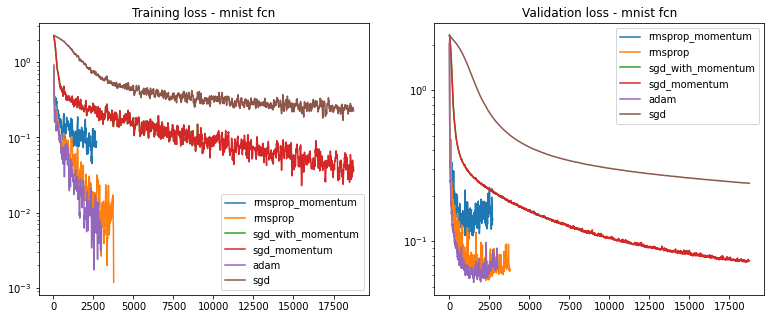

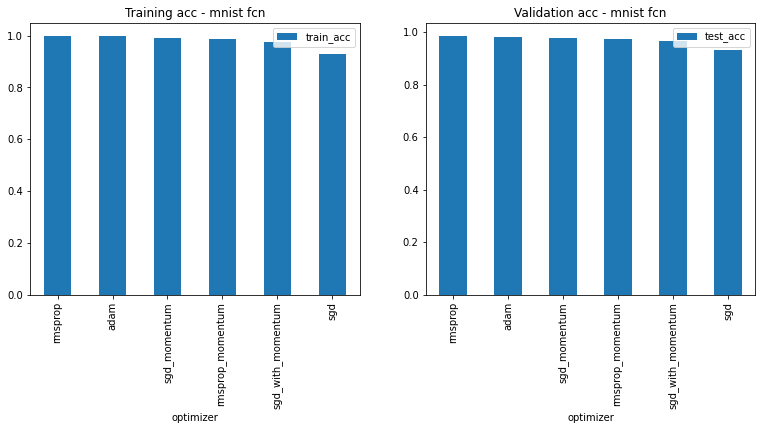

In [473]:
ds = 'mnist'
model = 'fcn'
plot_comparison(ds, model)

## CNN

Found runs ['out/mnist/cnn/rmsprop_momentum/loss.log', 'out/mnist/cnn/rmsprop/loss.log', 'out/mnist/cnn/sgd_with_momentum/loss.log', 'out/mnist/cnn/sgd_momentum/loss.log', 'out/mnist/cnn/adam/loss.log', 'out/mnist/cnn/sgd/loss.log']
Found runs ['out/mnist/cnn/rmsprop_momentum/acc.log', 'out/mnist/cnn/rmsprop/acc.log', 'out/mnist/cnn/sgd_with_momentum/acc.log', 'out/mnist/cnn/sgd_momentum/acc.log', 'out/mnist/cnn/adam/acc.log', 'out/mnist/cnn/sgd/acc.log']


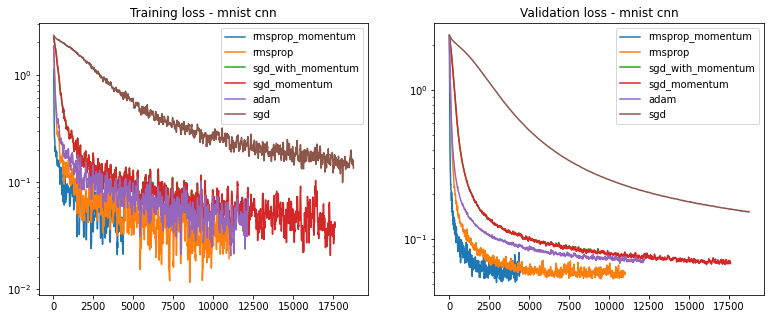

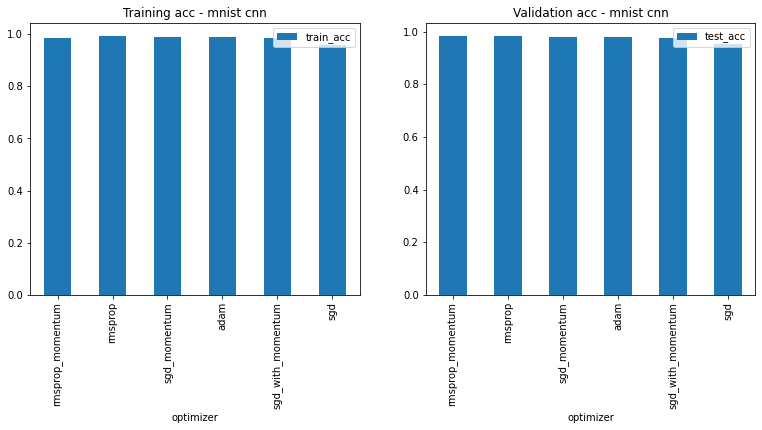

In [474]:
ds = 'mnist'
model = 'cnn'
plot_comparison(ds, model)

# CIFAR

## Fully Connected Network

Found runs ['out/cifar/fcn/rmsprop_momentum/loss.log', 'out/cifar/fcn/rmsprop/loss.log', 'out/cifar/fcn/sgd_with_momentum/loss.log', 'out/cifar/fcn/sgd_momentum/loss.log', 'out/cifar/fcn/adam/loss.log', 'out/cifar/fcn/sgd/loss.log']
Found runs ['out/cifar/fcn/rmsprop_momentum/acc.log', 'out/cifar/fcn/rmsprop/acc.log', 'out/cifar/fcn/sgd_with_momentum/acc.log', 'out/cifar/fcn/sgd_momentum/acc.log', 'out/cifar/fcn/adam/acc.log', 'out/cifar/fcn/sgd/acc.log']


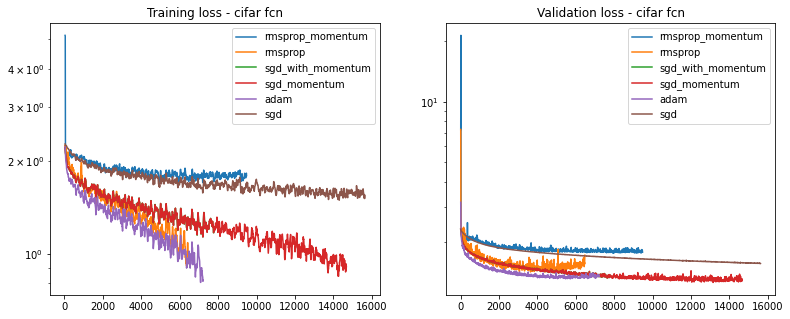

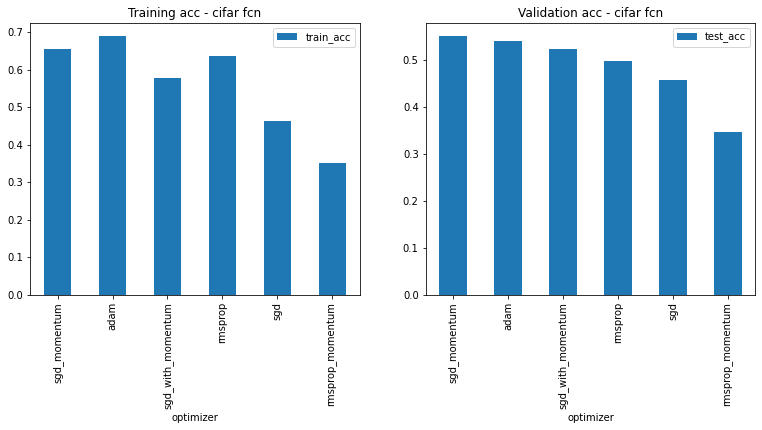

In [475]:
ds = 'cifar'
model = 'fcn'
plot_comparison(ds, model)

## CNN

Found runs ['out/cifar/cnn/rmsprop_momentum/loss.log', 'out/cifar/cnn/rmsprop/loss.log', 'out/cifar/cnn/sgd_with_momentum/loss.log', 'out/cifar/cnn/sgd_momentum/loss.log', 'out/cifar/cnn/adam/loss.log', 'out/cifar/cnn/sgd/loss.log']
Found runs ['out/cifar/cnn/rmsprop_momentum/acc.log', 'out/cifar/cnn/rmsprop/acc.log', 'out/cifar/cnn/sgd_with_momentum/acc.log', 'out/cifar/cnn/sgd_momentum/acc.log', 'out/cifar/cnn/adam/acc.log', 'out/cifar/cnn/sgd/acc.log']


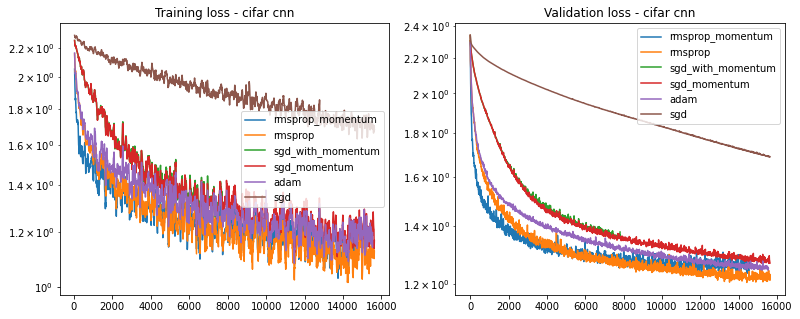

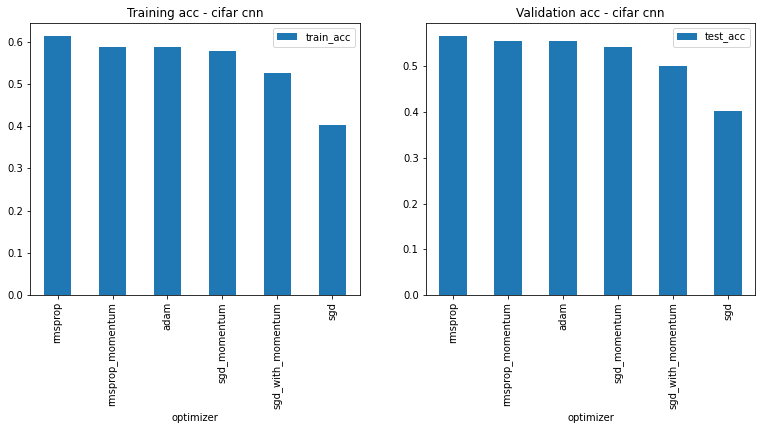

In [476]:
ds = 'cifar'
model = 'cnn'
plot_comparison(ds, model)